# Investigating Alcohol Consumption Trends in Ireland
---
This projects aims to analyse how alcohol consumption levels in Ireland have changed over time and examine the relationship between public health campaigns and reported drinking habits across demographics before stricter laws on health labels on alcohol products come into place in 2026.

## Background

It is widely known that alcohol, especially consumed in excess is bad for your health. The WHO reported that 2.6 million people died in 2019 due to alcohol related illnesses and that the worldwide total consumption of alcohol is equal to 5.5 litres of pure alcohol per person of age 15 years and older [1]. In Ireland, the per-capita alcohol consumption (11.3 recorded in 2016) is greater than the whole European region (9.8 in 2016) [2]. And of this nearly 40% participating in heavy episodic drinking which is six standard drinks or more in a single drinking session [2]. This is most common amongst men between 15 upto 34 years particularly from lower socio-economic groups compared to women in the same age range. Despite this high level of hazardous drinking, majority of Irish drinkers would consider themselves light to moderate drinkers which shows the disconnect between what the general public think is considered hazardous drinking and what it actually is [3]. The WHO estimates that alcohol harm costs the country €12 billion every year [4] which is an enormous amount of money to spend every year for something that is preventable. In an effort to reduce this spending, the government have introduced legislation via the Public Health (Alcohol) Act 2018. Since this Act was introduced there have been stricter laws regarding the pricing and advertising of alcohol as well as the separating of it in grocery shops and restrictions on times it can be sold throughout the week in shops and in pubs and nightclubs [5]. There is still more to come with stricter health labels due to come in 2026 [6]. This is all in attempt to reduce the overall consumption of alcohol in the country which has been somewhat successful as the consumption of alcohol has been declining considerably since 2018.

[1]: https://www.who.int/data/gho/data/themes/global-information-system-on-alcohol-and-health
[2]: https://iris.who.int/bitstream/handle/10665/274603/9789241565639-eng.pdf
[3]: https://www.drugsandalcohol.ie/34737/
[4]: https://alcoholireland.ie/facts-about-alcohol/how-much-do-we-drink/
[5]: https://bmjopen.bmj.com/content/8/5/e021932#ref-2
[6]: https://www.drugsandalcohol.ie/40656/1/Drugnet_Ireland_issue_87.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and open dataset with pandas
df = pd.read_csv("alcohol_consumption.csv")

In [3]:
df.head(10)

,STATISTIC,Statistic Label,TLIST(A1),Year,C02199V02655,Sex,C04143V04909,Country of Birth,UNIT,VALUE
0,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,-,Both sexes,-,All countries,%,76.8
1,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,-,Both sexes,IE,Ireland,%,77.7
2,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,-,Both sexes,UK,UK,%,81.6
3,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,-,Both sexes,ZZEUAB,EU15,%,75.7
4,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,-,Both sexes,ZZROEU,Rest of EU,%,79.2
5,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,-,Both sexes,ZZROW,Rest of World,%,54.5
6,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,1,Male,-,All countries,%,79.7
7,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,1,Male,IE,Ireland,%,79.8
8,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,1,Male,UK,UK,%,85.8
9,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,2015,1,Male,ZZEUAB,EU15,%,82.9


In [4]:
df.drop(columns=['TLIST(A1)', 'C04143V04909'])

,STATISTIC,Statistic Label,Year,C02199V02655,Sex,Country of Birth,UNIT,VALUE
0,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,-,Both sexes,All countries,%,76.8
1,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,-,Both sexes,Ireland,%,77.7
2,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,-,Both sexes,UK,%,81.6
3,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,-,Both sexes,EU15,%,75.7
4,HIS46C01,Persons who consumed alcohol in the last twelv...,2015,-,Both sexes,Rest of EU,%,79.2
...,...,...,...,...,...,...,...,...
139,HIS46C01,Persons who consumed alcohol in the last twelv...,2024,2,Female,Ireland,%,72.3
140,HIS46C01,Persons who consumed alcohol in the last twelv...,2024,2,Female,UK,%,75.0
141,HIS46C01,Persons who consumed alcohol in the last twelv...,2024,2,Female,EU15,%,80.2
142,HIS46C01,Persons who consumed alcohol in the last twelv...,2024,2,Female,Rest of EU,%,68.5


In [5]:
# Filter for the row with "All countries" only
all_countries_df = df[df["Country of Birth"] == "All countries"]

# Verify the filtered data
print(all_countries_df.head())

   STATISTIC                                    Statistic Label  TLIST(A1)  \
0   HIS46C01  Persons who consumed alcohol in the last twelv...       2015   
6   HIS46C01  Persons who consumed alcohol in the last twelv...       2015   
12  HIS46C01  Persons who consumed alcohol in the last twelv...       2015   
18  HIS46C01  Persons who consumed alcohol in the last twelv...       2016   
24  HIS46C01  Persons who consumed alcohol in the last twelv...       2016   

    Year C02199V02655         Sex C04143V04909 Country of Birth UNIT  VALUE  
0   2015            -  Both sexes            -    All countries    %   76.8  
6   2015            1        Male            -    All countries    %   79.7  
12  2015            2      Female            -    All countries    %   74.0  
18  2016            -  Both sexes            -    All countries    %   74.9  
24  2016            1        Male            -    All countries    %   78.1  


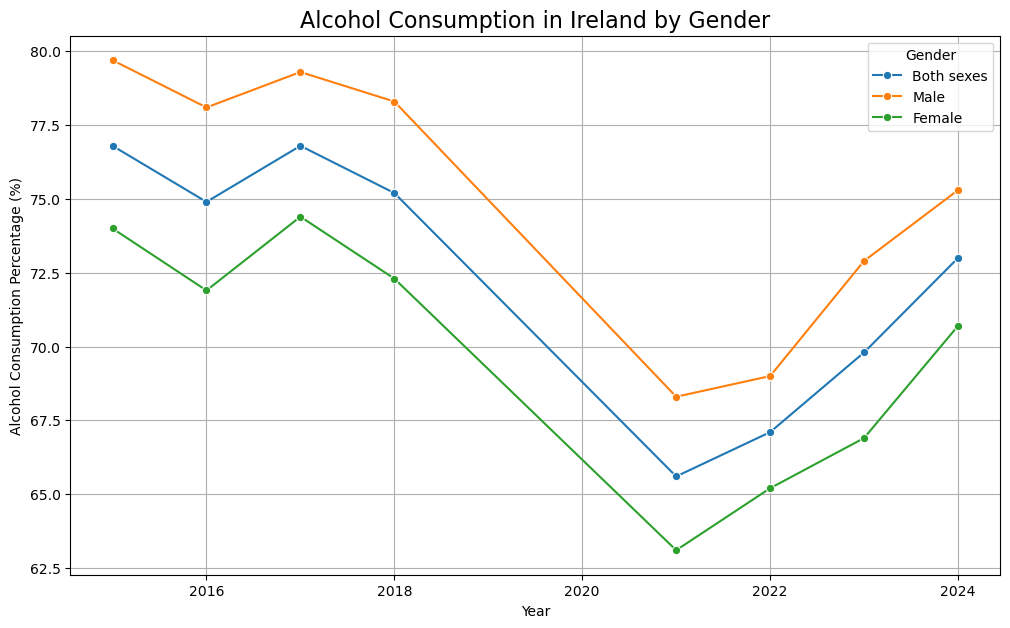

In [6]:
# Lineplot for trend in alcohol consumption in Ireland
plt.figure(figsize=(12, 7))
sns.lineplot(data=all_countries_df, x="Year", y="VALUE", hue="Sex", marker="o")

# Customize
plt.title("Alcohol Consumption in Ireland by Gender", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Alcohol Consumption Percentage (%)")
plt.legend(title="Gender")
plt.grid(True)

# Show the plot
plt.show()


The above graph shows what percentage of people aged 15 years and older consumed alcohol in the last 12 months from 2015 to 2024. The percentage decreased from 2015 to 2016, then increased again in 2017 and then continued to decrease from 2018 to 2021. The Public Health (Alcohol) Act 2018 was signed into law in October 2018 which may have a hand in the reduction of alcohol consumption along with the Covid-19 which saw restrictions last until early 2021. Covid-19 restrictions meant that people were unable to go out to pubs, nightclubs and even restaurants which would greatly reduce the amount of alcohol consumed. People would be confined to drinking alcohol in their homes which may not appeal to people who are strictly social drinkers. There was also no sporting events, concerts or festivals which normally spark heavy drinking. As restrictions eased and the world returned to normal, the consumption of alcohol also increased with about 75% of men and about 71% of women having conumed alcohol in 2024 which is still lower than 2018 (~78% of men and ~72% of women) but is still quite significant.

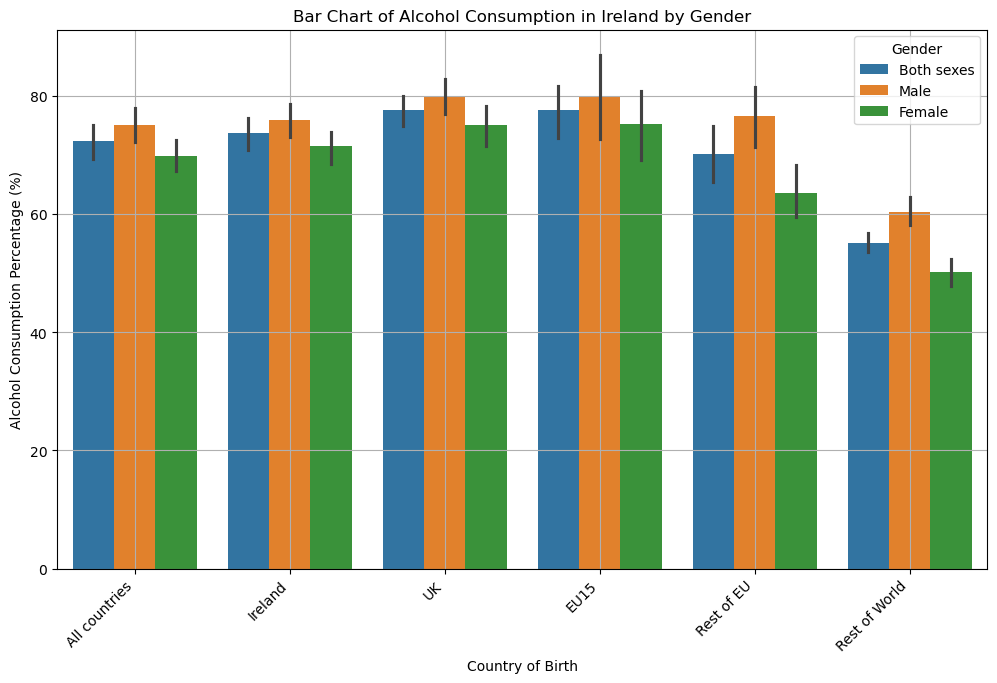

In [7]:
# Bar chart for alcohol consumption in Ireland
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x="Country of Birth", y="VALUE", hue="Sex")

plt.title("Bar Chart of Alcohol Consumption in Ireland by Gender")
plt.xlabel("Country of Birth")
plt.ylabel("Alcohol Consumption Percentage (%)")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha="right")
plt.grid(True)

# Show the plot
plt.show()

When you break down this consumption by country of birth, persons born in the EU, particularly the EU15 which includes Belgium, Denmark, Germany, Finland, France, Greece, Ireland, Italy, Luxembourg, Netherlands, Austria, Portugal, Spain, the United Kingdom and Sweden are highest consumers of alcohol in Ireland. This is unsurpring as Europe as a whole has one of the highest alcohol consumption rates in the world. There is a culture of drinking within these countries that wouldn't decrease when coming to Ireland due to the culture of drinking in Ireland also. The group of people with the lowest consumption of drinking are people from outside the EU which is most likely to include people from majority Muslim countries were drinking is prohibited and countries where there isn't a strong drinking culture. As with the first graph, men make up the highest percentage of drinkers in all categories.

In [8]:
df2 = pd.read_csv("binge_drinking.csv")

In [9]:
df2

,STATISTIC,Statistic Label,TLIST(A1),Year,C02199V02655,Sex,C02076V03371,Age Group,UNIT,VALUE
0,HIS47C01,Persons who binge drink,2015,2015,-,Both sexes,-,All ages,%,30.5
1,HIS47C01,Persons who binge drink,2015,2015,-,Both sexes,300,15 - 19 years,%,25.1
2,HIS47C01,Persons who binge drink,2015,2015,-,Both sexes,365,20 - 24 years,%,61.8
3,HIS47C01,Persons who binge drink,2015,2015,-,Both sexes,410,25 - 29 years,%,51.6
4,HIS47C01,Persons who binge drink,2015,2015,-,Both sexes,440,30 - 34 years,%,35.0
...,...,...,...,...,...,...,...,...,...,...
331,HIS47C01,Persons who binge drink,2024,2024,2,Female,530,55 - 59 years,%,12.1
332,HIS47C01,Persons who binge drink,2024,2024,2,Female,550,60 - 64 years,%,9.6
333,HIS47C01,Persons who binge drink,2024,2024,2,Female,565,65 - 69 years,%,5.0
334,HIS47C01,Persons who binge drink,2024,2024,2,Female,580,70 - 74 years,%,4.3


In [10]:
df2.drop(columns=['TLIST(A1)'])

,STATISTIC,Statistic Label,Year,C02199V02655,Sex,C02076V03371,Age Group,UNIT,VALUE
0,HIS47C01,Persons who binge drink,2015,-,Both sexes,-,All ages,%,30.5
1,HIS47C01,Persons who binge drink,2015,-,Both sexes,300,15 - 19 years,%,25.1
2,HIS47C01,Persons who binge drink,2015,-,Both sexes,365,20 - 24 years,%,61.8
3,HIS47C01,Persons who binge drink,2015,-,Both sexes,410,25 - 29 years,%,51.6
4,HIS47C01,Persons who binge drink,2015,-,Both sexes,440,30 - 34 years,%,35.0
...,...,...,...,...,...,...,...,...,...
331,HIS47C01,Persons who binge drink,2024,2,Female,530,55 - 59 years,%,12.1
332,HIS47C01,Persons who binge drink,2024,2,Female,550,60 - 64 years,%,9.6
333,HIS47C01,Persons who binge drink,2024,2,Female,565,65 - 69 years,%,5.0
334,HIS47C01,Persons who binge drink,2024,2,Female,580,70 - 74 years,%,4.3


In [11]:
# Filter for the row with "All age groups" only
all_age_groups_df = df2[df2["Age Group"] == "All ages"]

# Verify the filtered data
print(all_age_groups_df.head())


   STATISTIC          Statistic Label  TLIST(A1)  Year C02199V02655  \
0   HIS47C01  Persons who binge drink       2015  2015            -   
14  HIS47C01  Persons who binge drink       2015  2015            1   
28  HIS47C01  Persons who binge drink       2015  2015            2   
42  HIS47C01  Persons who binge drink       2016  2016            -   
56  HIS47C01  Persons who binge drink       2016  2016            1   

           Sex C02076V03371 Age Group UNIT  VALUE  
0   Both sexes            -  All ages    %   30.5  
14        Male            -  All ages    %   45.5  
28      Female            -  All ages    %   16.1  
42  Both sexes            -  All ages    %   28.1  
56        Male            -  All ages    %   43.5  


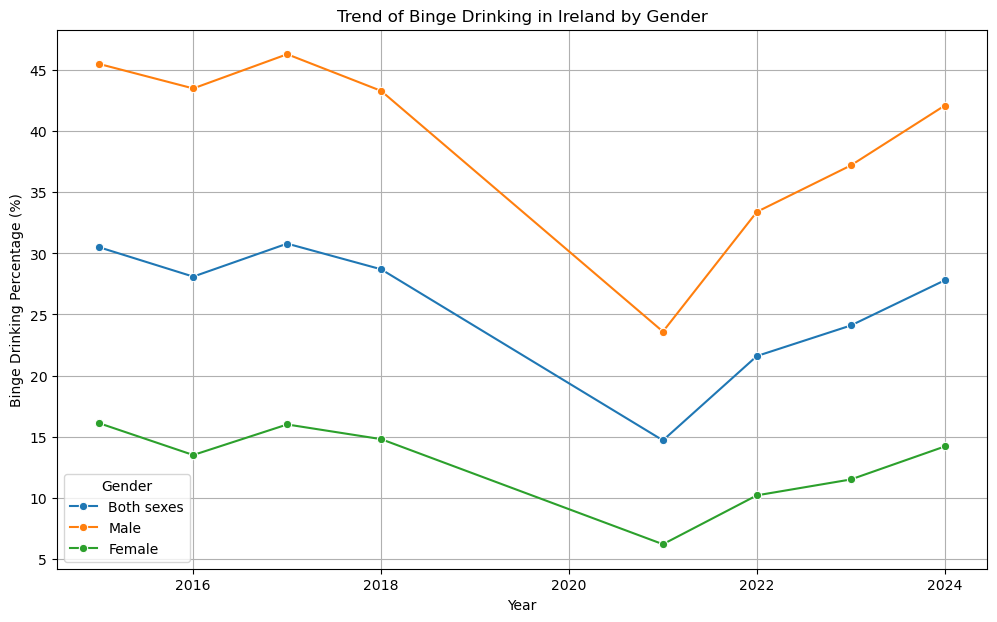

In [12]:
# Lineplot for binge drinking in Ireland by gender
plt.figure(figsize=(12, 7))
sns.lineplot(data=all_age_groups_df, x="Year", y="VALUE", hue="Sex", marker="o")

plt.title("Trend of Binge Drinking in Ireland by Gender")
plt.xlabel("Year")
plt.ylabel("Binge Drinking Percentage (%)")
plt.legend(title="Gender")
plt.grid(True)

# Show the plot
plt.show()


This graph shows the prevalence of binge drinking thoughout the last decade. It follows the same trend as the alcohol consumption graph which is expected. However, men make up a greater percentage of binge drinkers - approx. 43% in 2024 compared to approx. 15% of women. A reason behind this may be due to a greater release of dopamine in men when they drink compared to women. Researchers from Columbia and Yale studied male and female college-age social drinkers. After consuming alcoholic or non-alcoholic drinks, subjects underwent a PET scan to measure the amount of alcohol-induced dopamine released. Despite similar consumption of alcohol, men had a greater dopamine release than women. It is also important to note this alcohol-induced dopamine release decreased over time with repeated heavy drinking which may be a hallmark for developing tolerance or transitioning into a habit [1].

[1]: https://www.sciencedaily.com/releases/2010/10/101018112308.htm

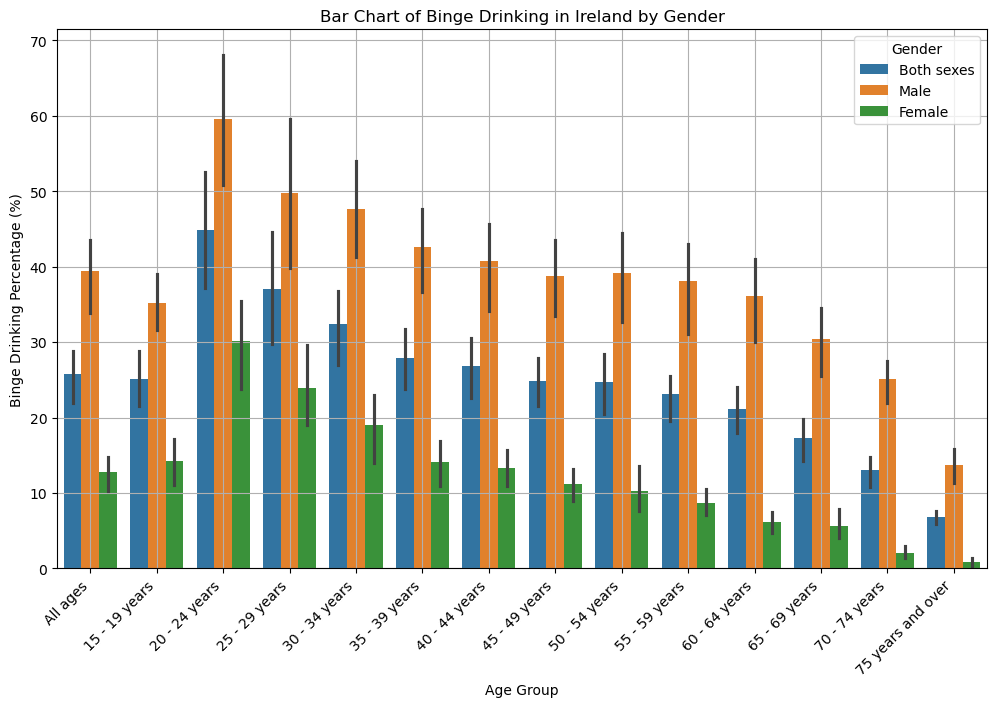

In [13]:
# Bar chart for binge drinking in Ireland
plt.figure(figsize=(12, 7))
sns.barplot(data=df2, x="Age Group", y="VALUE", hue="Sex")

plt.title("Bar Chart of Binge Drinking in Ireland by Gender")
plt.xlabel("Age Group")
plt.ylabel("Binge Drinking Percentage (%)")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha="right")
plt.grid(True)

# Show the plot
plt.show()

The graph show the percentage of binge drinking by age. The age group with the highest percentage of binge drinking is 20-24 years with the amount of men being almost double the amount of women. This age group are likely to be college students and college culture is often associated with heavy drinking. As the age group increases, the percentage of binge drinking decreases. However in every age group the percentage of men that binge drink is either double or more than double the percentage of women. This is disturbing as even though alcohol is linked to diseases like breast cancer which primarily affect women, men make up a larger portion of all alcohol related discharges and deaths [1]. Men are also more prone to anxiety and low moods which is often exacerbated by alcohol abuse [2].

[1]: https://www.drugsandalcohol.ie/34737/
[2]: https://www.drinkaware.ie/research-reveals-men-are-more-likely-to-binge-drink-than-women-with-men-more-prone-to-drinking-alone-at-home/

In [14]:
filtered_df = all_countries_df[all_countries_df["Sex"] == "Both sexes"]
filtered_df2 = all_age_groups_df[all_age_groups_df["Sex"] == "Both sexes"]

# Verify the filtered data
print(filtered_df.head())

# Verify the filtered data
print(filtered_df2.head())

   STATISTIC                                    Statistic Label  TLIST(A1)  \
0   HIS46C01  Persons who consumed alcohol in the last twelv...       2015   
18  HIS46C01  Persons who consumed alcohol in the last twelv...       2016   
36  HIS46C01  Persons who consumed alcohol in the last twelv...       2017   
54  HIS46C01  Persons who consumed alcohol in the last twelv...       2018   
72  HIS46C01  Persons who consumed alcohol in the last twelv...       2021   

    Year C02199V02655         Sex C04143V04909 Country of Birth UNIT  VALUE  
0   2015            -  Both sexes            -    All countries    %   76.8  
18  2016            -  Both sexes            -    All countries    %   74.9  
36  2017            -  Both sexes            -    All countries    %   76.8  
54  2018            -  Both sexes            -    All countries    %   75.2  
72  2021            -  Both sexes            -    All countries    %   65.6  
    STATISTIC          Statistic Label  TLIST(A1)  Year C02199V

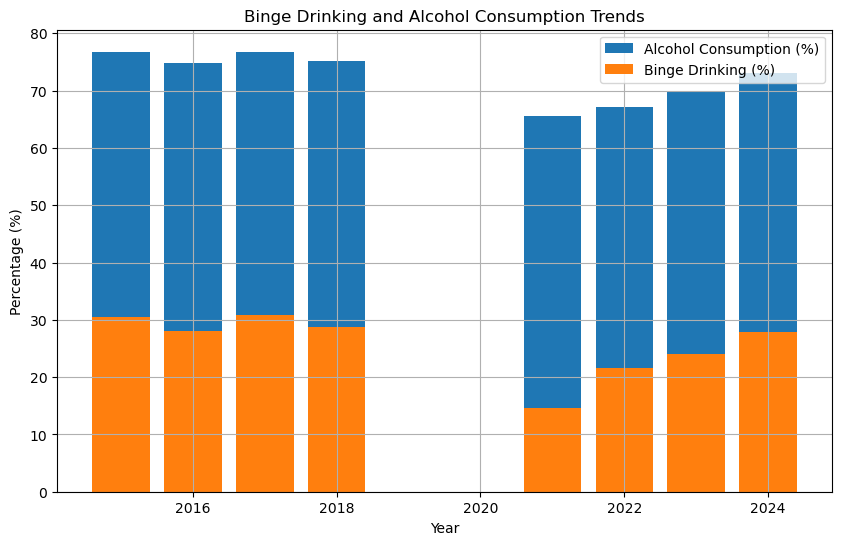

In [15]:
# Merging the datasets to compare the alcohol consumption to the binge drinking
merged_df = pd.merge(filtered_df, filtered_df2, on="Year")

# Plot the two lines on the same plot
plt.figure(figsize=(10, 6))
plt.bar(merged_df["Year"], merged_df["VALUE_x"], label="Alcohol Consumption (%)")
plt.bar(merged_df["Year"], merged_df["VALUE_y"], label="Binge Drinking (%)")

# Customize the plot
plt.title("Binge Drinking and Alcohol Consumption Trends")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid()
plt.show()


The graph above helps to better visualise the relationship between alcohol consumption and binge drinking. From 2015 - 2018, of the percentage of people who drink, about 30% of them binge drink. These values drop in 2021 but are slowly on the rise again as 2024 bar is quite close to the 2018 bar. The percentage of binge drinkers rises and falls with the percentage of people who consumed alcohol.

## Discussion
---

The Public Health (Alcohol) Act was passed in 2018 and since then has slowly worked to tackle the unhealthy relationship Ireland has with alcohol. It's main goal is to reduce the annual per capita alcohol use by 20% over seven years, to 9.1 litres per capita [1].

The first step taken was to ban alcohol advertising outdoors near youth-orientated environments such as schools and youth clubs, on public transport, at the cinema unless the film is rated 18+ and children's clothing that promotes alcohol. These steps are unlikely to make a huge difference in the alcohol consumption rates of adults but may reduce underage drinking. In 2021, alcohol advertising was banned from the sports fields. It was also banned from events predominantly held for and aimed at children [1].

In November 2020 a law was brought in that saw all alcoholic products being separated from the other products in mixed retail outlets such a grocery stores. The aim behind this was to make sure alcohol was no longger seen as routine grocery goods and to also limit children's exposure to alcohol in an everyday setting [1].

In January 2022, minimum unit pricing came into effect. The minimum price was set at 10 cent per gram of alcohol in the product. This reduced the amount of hyper discounting of alcohol which would then in turn promote mass buying and  binge drinking. It is estimated that this law could potentially reduce the population's consumption by 8.8% [1].

The next installment of this Act would see mandatory health warning labels on the alcohol products similar to the ones seen on cigarette packets. This was signed into law in 2023 but will not be made mandatory until 2026. The labels will outline the dangers of consuming alcohol when pregnant and the link between alcohol and fatal cancers such as breast cancer. This comes as when surveyed, 1 in 10 respondents reported to always or often seeing health mmessages when looking at alcohol packaging, while 59% report to have never seen the health messages [2]. However 16% do report hearing the health messages in advertising [2]. With the decline of people watching TV, it is important that all alcohol contains appropriate labelling so that the health risks associated with drinking reach a wider audience.

With this all in mind it is unclear if these changes implemented have had any effect. During Covid-19, pubs and nightclubs were closed which saw more people drinking at home. Cans of mixed cocktails became popular as they were quite cheap and this normalised drinking at home. This behaviour continued even after Covid as from the above trend graphs, alcohol consumption is on the rise again. Even with the minimum pricing, alcohol and sugar tax which are all laws that would make alcohol more expensive, it hasn't reduced the consumption by a large percentage. During Covid, people reported drinking due to stress and it seems like that stress hasn't gone away. With cost of living on the rise globally, people are still willing to purchase alcohol to relieve stress from this crisis. The laws brought in doesn't seem to have a huge effect on the consumption levels. This leads me to believe that drinking is so deeply engrained in the DNA of Irish people that it may take more than a few laws to see significant changes in the drinking patterns.  

[1]: https://www.drugsandalcohol.ie/37618/1/AAI-PHAA-Progress-Review-11.22.pdf
[2]: https://www.drugsandalcohol.ie/40656/1/Drugnet_Ireland_issue_87.

# References
---
1. Dataset for alcohol consumption in the last 12 months: https://data.gov.ie/dataset/his46-alcohol-consumption-in-last-12-months
2. Dataset on binge drinking: https://data.gov.ie/en_GB/dataset/his47-binge-drinking
3. Discussion info: https://www.drugsandalcohol.ie/37618/1/AAI-PHAA-Progress-Review-11.22.pdf
4.  Discussion info: https://www.drugsandalcohol.ie/40656/1/Drugnet_Ireland_issue_87.